# **Lab Assessment 3**
# **PMDS505P - Machine Learning Lab**
## **Name:** Soumyadeep Ganguly
## **Register no.:** 24MDT0082
## **MSc DATA SCIENCE**

## **Q1. Today we will implement multiple linear regression technique to fit a model in connection with the dataset ”Book1.csv”**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Book1.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
0,13300000,7420,4,2,3,2,furnished
1,12250000,8960,4,4,4,3,furnished
2,12250000,9960,3,2,2,2,semi-furnished
3,12215000,7500,4,2,2,3,furnished
4,11410000,7420,4,1,2,2,furnished


In [3]:
df.drop(['furnishingstatus'], axis=1, inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)
columns = df.columns
scaled_df = pd.DataFrame(scaled_data, columns=columns)
scaled_df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,1.000000,0.356777,0.50,0.333333,0.666667,0.666667
1,0.880096,0.469597,0.50,1.000000,1.000000,1.000000
2,0.880096,0.542857,0.25,0.333333,0.333333,0.666667
3,0.876099,0.362637,0.50,0.333333,0.333333,1.000000
4,0.784173,0.356777,0.50,0.000000,0.333333,0.666667


In [8]:
y = df['price']
X = df.drop(['price'], axis=1)
y.shape

(249,)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [15]:
print(f"Intercept: {LR.intercept_}")
print(f"Coefficient: {LR.coef_}")

Intercept: 1993028.543557263
Coefficient: [1.65126096e+02 2.72715571e+05 9.55063547e+05 2.71722081e+05
 4.12416981e+05]


## **Q2. Next write an appropriate gradient descent algorithm and determine the values of the parameters involved in the prediction function.**

In [19]:
def gradient_decent(xt, yt, m_b, n_b, L):
    D_m = 0
    D_n = 0
    for i in range(len(xt)):
        D_m += (2 / len(xt)) * ((m_b * xt[i] + n_b - yt[i]) * xt[i])
        D_n += (2 / len(xt)) * (m_b * xt[i] + n_b - yt[i])
    m_b_new = m_b - L * D_m
    n_b_new = n_b - L * D_n
    return m_b_new, n_b_new

def run_gradient_descent(xt, yt, m_b, n_b, L, max_iterations=1000):
    for iteration in range(max_iterations):
        m_b_new, n_b_new = gradient_decent(xt, yt, m_b, n_b, L)
        if np.all(np.round(m_b_new, 4) == np.round(m_b, 4)) and np.all(np.round(n_b_new, 4) == np.round(n_b, 4)):
            print(f"Converged after {iteration + 1} iterations.")
            break
        m_b, n_b = m_b_new, n_b_new
    else:
        print("Maximum iterations reached without full convergence.")
    return m_b, n_b

m_b = 0.0
n_b = 0.0
learning_rate = 0.2

m_b, n_b = run_gradient_descent(np.array(X_train), np.array(y_train), m_b, n_b, learning_rate)
print(f"Final parameters: m_b = {m_b}, n_b = {n_b}")

C:\Users\sambh\AppData\Local\Temp\ipykernel_14260\15686117.py:5: RuntimeWarning: overflow encountered in multiply
  D_m += (2 / len(xt)) * ((m_b * xt[i] + n_b - yt[i]) * xt[i])
C:\Users\sambh\AppData\Local\Temp\ipykernel_14260\15686117.py:7: RuntimeWarning: invalid value encountered in subtract
  m_b_new = m_b - L * D_m
e:\VIT Study Materials\SEM 2\Data Mining and ML\LAB\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)


Maximum iterations reached without full convergence.
Final parameters: m_b = [             nan              nan  1.29526272e+006 -1.89314472e+230
  5.51903568e+005], n_b = [             nan              nan  4.37182751e+006 -7.24353163e+229
  5.79369342e+006]


## **Q3. Implement the Linear regression problem what we attempted using the Trainingsetheights200 dataset in the last lab using stochastic gradient descent and mini batch gradient descent and present the results and plots of your model. Also find the testing error in both the cases.**

In [20]:
data = pd.read_csv('Training_set_heights200.csv')
data.head()

,Height,Weight
0,127.8296,67.63371
1,123.4114,65.95421
2,134.4043,66.14316
3,155.9981,73.45251
4,136.1354,69.30943


In [23]:
scaled_dt = scaler.fit_transform(data)
X = scaled_dt[:,0]   
y = scaled_dt[:,1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
x_trn = np.insert(X_train.reshape(-1,1),0,np.ones(len(X_train.reshape(-1,1))),axis=1)

In [24]:
def sgd(xt,yt,theta,a):
    m = len(xt)
    i = np.random.randint(0,len(xt))
    dt = (2/m)*np.dot((np.dot(t,xt[i,:].T)-yt[i]),xt[i,:].T)
    theta-=a*dt
    return theta

t = np.zeros(len(x_trn[0]))
epochs = 1000
a = 0.5
for i in range(epochs):
    t = sgd(x_trn,y_train,t,a)

t

array([0.40707359, 0.24892946])

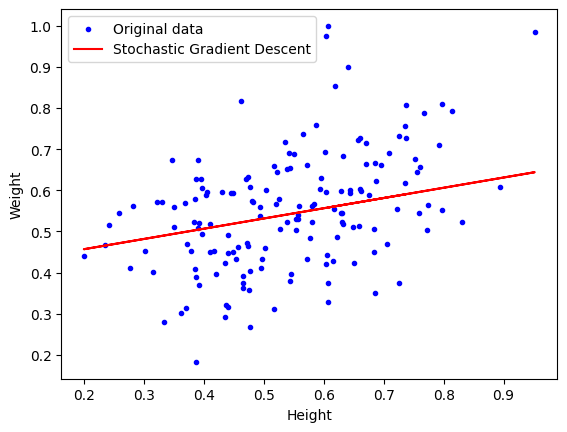

In [26]:
y_pred = t@x_trn.T

fig, axs = plt.subplots()
axs.scatter(X_train,y_train,color='b',marker='.',label='Original data')
axs.plot(X_train,y_pred,color='red',label='Stochastic Gradient Descent')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

## **Q4. When we look at the scatter plot of the data in trainingheights200.csv. It can be identified that there is a quadratic nature for the data. So it would be good we can go for such a model.**

In [28]:
df = pd.read_csv('Training_set_heights200.csv')
df.head()

,Height,Weight
0,127.8296,67.63371
1,123.4114,65.95421
2,134.4043,66.14316
3,155.9981,73.45251
4,136.1354,69.30943


In [29]:
scaled_data = scaler.fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(scaled_data[:,0],scaled_data[:,1],test_size=0.3,random_state=0)

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3,include_bias=True)
x_train_poly = poly.fit_transform(X_train.reshape(-1,1)) 
#convert x_train and x_test to a 2D column matrix
x_test_poly = poly.transform(X_test.reshape(-1,1))

In [31]:
MLR = LinearRegression()
MLR.fit(x_train_poly, y_train)

LinearRegression()

In [32]:
y_train_pred = MLR.predict(x_train_poly)
y_test_pred = MLR.predict(x_test_poly)

In [34]:
from sklearn.metrics import mean_squared_error
train_e = mean_squared_error(y_train,y_train_pred)
test_e = mean_squared_error(y_test,y_test_pred)

print(f'Training Error: {train_e}')
print(f'Testing Error: {test_e}')

Training Error: 0.015123017896174455
Testing Error: 0.031124085897679937


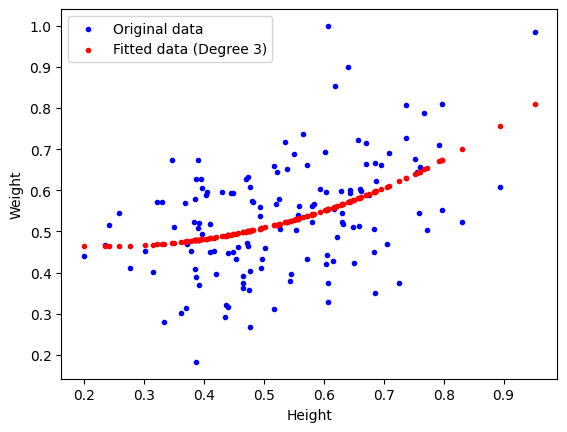

In [35]:
plt.scatter(X_train,y_train,color='b',marker='.',label='Original data')
plt.scatter(X_train,y_train_pred,color='red',marker='.',label='Fitted data (Degree 3)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()